In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression


In [58]:
# read and sort data
df = pd.read_excel('imputed_temperature_columns_by_day_poly_lasso_cv.xlsx')
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)
y_dis = df['Dissolved_Phosphorus']
y_tot = df['Total_Phosphorus']
X = df.drop(['Dissolved_Phosphorus', 'Total_Phosphorus'], axis=1)
X = X.drop(['date'], axis=1)


# train test split
X_train, X_test, y_train_dis, y_test_dis = train_test_split(X, y_dis, test_size=0.2, random_state=43)
X_train, X_test, y_train_tot, y_test_tot = train_test_split(X, y_tot, test_size=0.2, random_state=43)



(930, 22)


Disolved Phosphorus - MSE: 743.2457
Disolved Phosphorus - MAE: 20.0451
Mean Absolute Error: 50.2957
Total Phosphorus - MSE: 4618.6075


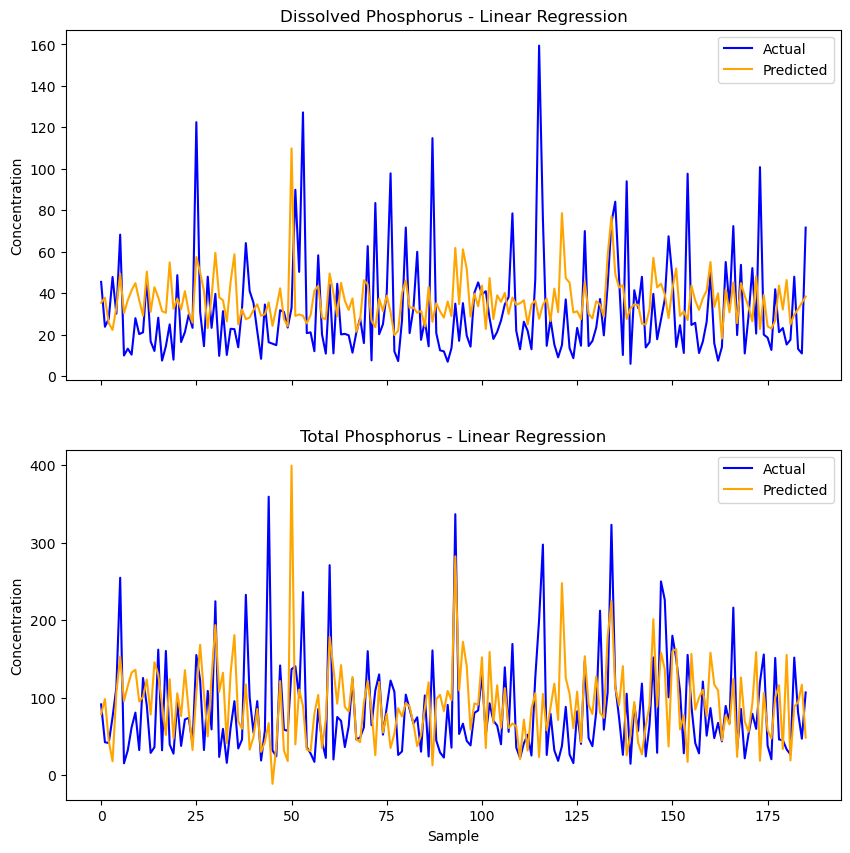

In [ ]:
# linear regression 

# dissolved phosphorus model
model_dis = LinearRegression()
model_dis.fit(X_train, y_train_dis)

# predict
y_pred_dis = model_dis.predict(X_test)

# error 
dis_lin_error = mean_squared_error(y_test_dis, y_pred_dis)
dis_lin_abs_error = mean_absolute_error(y_test_dis, y_pred_dis)
print(f"Disolved Phosphorus - MSE: {dis_lin_error:.4f}")
print(f"Disolved Phosphorus - MAE: {dis_lin_abs_error:.4f}")

# total phosphorus model
model_tot = LinearRegression()
model_tot.fit(X_train, y_train_tot)
y_pred_tot = model_tot.predict(X_test)

# error
mse_tot = mean_squared_error(y_test_tot, y_pred_tot)
mae_tot = mean_absolute_error(y_test_tot, y_pred_tot)
print(f"Mean Absolute Error: {mae_tot:.4f}")
print(f"Total Phosphorus - MSE: {mse_tot:.4f}")

# subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(y_test_dis.values, label='Actual', color='blue')
axs[0].plot(y_pred_dis, label='Predicted', color='orange')
axs[0].set_title('Dissolved Phosphorus - Linear Regression')
axs[0].set_ylabel('Concentration')
axs[0].legend()

axs[1].plot(y_test_tot.values, label='Actual', color='blue')
axs[1].plot(y_pred_tot, label='Predicted', color='orange')
axs[1].set_title('Total Phosphorus - Linear Regression')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Concentration')
axs[1].legend()




Lasso Regression - Total Phosphorus - MSE: 4376.9004
Lasso Regression - Total Phosphorus - MAE: 48.7519


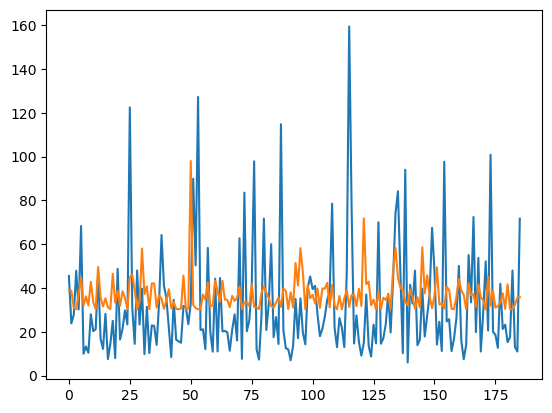

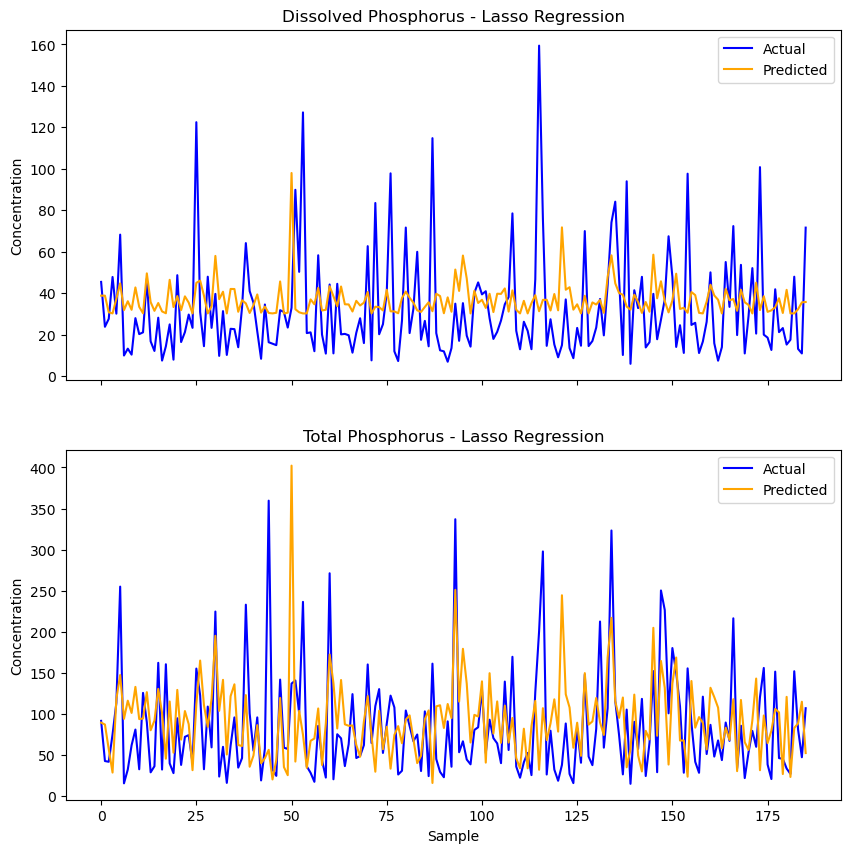

In [ ]:
# lasso regression (with cross-validation)

from sklearn.linear_model import LassoCV

# normalize data
X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_test_norm = (X_test - X_train.mean()) / X_train.std()


# disolved phosphorus
lasso = LassoCV(eps = 0.01, n_alphas=100, random_state=42)
lasso.fit(X_train_norm, y_train_dis)
lasso_pred_dis = lasso.predict(X_test_norm)

# evaluate error
mse_lasso_dis = mean_squared_error(y_test_dis, lasso_pred_dis)
mae_lasso_dis = mean_absolute_error(y_test_dis, lasso_pred_dis)


# plot
plt.plot(y_test_dis.values, label='Actual')
plt.plot(lasso_pred_dis, label='Predicted')


# total phosphorus
lasso = LassoCV(eps = 0.01, n_alphas=100, random_state=42)
lasso.fit(X_train_norm, y_train_tot)
lasso_pred_tot = lasso.predict(X_test_norm)

# evaluate error
lasso_mse_tot = mean_squared_error(y_test_tot, lasso_pred_tot)
lasso_mae_tot = mean_absolute_error(y_test_tot, lasso_pred_tot)
print(f"Lasso Regression - Total Phosphorus - MSE: {lasso_mse_tot:.4f}")
print(f"Lasso Regression - Total Phosphorus - MAE: {mean_absolute_error(y_test_tot, lasso_pred_tot):.4f}")


# subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(y_test_dis.values, label='Actual', color='blue')
axs[0].plot(lasso_pred_dis, label='Predicted', color='orange')
axs[0].set_title('Dissolved Phosphorus - Lasso Regression')
axs[0].set_ylabel('Concentration')
axs[0].legend()

axs[1].plot(y_test_tot.values, label='Actual', color='blue')
axs[1].plot(lasso_pred_tot, label='Predicted', color='orange')
axs[1].set_title('Total Phosphorus - Lasso Regression')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Concentration')
axs[1].legend()




Ridge Regression - Dissolved Phosphorus - MSE: 708.0907
Ridge Regression - Dissolved Phosphorus - MAE: 19.5113
Ridge Regression - Total Phosphorus - MSE: 4541.2529
Ridge Regression - Total Phosphorus - MAE: 49.9352


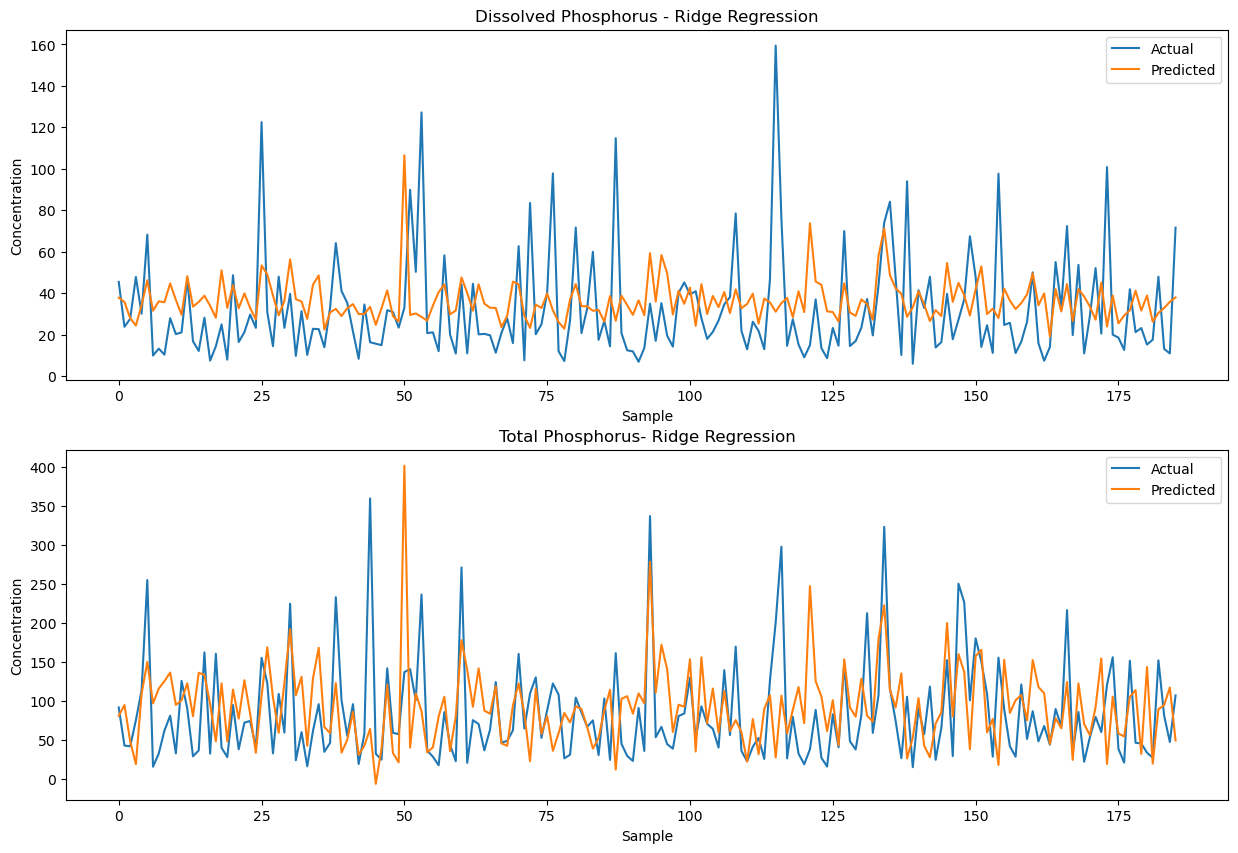

In [76]:
# cross validation ridge regression
from sklearn.linear_model import RidgeCV

# disolved phosphorus model
ridge = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100])
ridge.fit(X_train_norm, y_train_dis)
ridge_pred_dis = ridge.predict(X_test_norm)


# evaluate error
mse_ridge_dis = mean_squared_error(y_test_dis, ridge_pred_dis)
print(f"Ridge Regression - Dissolved Phosphorus - MSE: {mse_ridge_dis:.4f}")
print(f"Ridge Regression - Dissolved Phosphorus - MAE: {mean_absolute_error(y_test_dis, ridge_pred_dis):.4f}")


# total phosphorus
ridge = RidgeCV(alphas = [.001, 0.01, 0.1, 1, 10, 100])
ridge.fit(X_train_norm, y_train_tot)
ridge_pred_tot = ridge.predict(X_test_norm)

# evaluate
mse_ridge_tot = mean_squared_error(y_test_tot, ridge_pred_tot)
mas_ridge_tot = mean_absolute_error(y_test_tot, ridge_pred_tot)

print(f"Ridge Regression - Total Phosphorus - MSE: {mse_ridge_tot:.4f}")
print(f"Ridge Regression - Total Phosphorus - MAE: {mas_ridge_tot:.4f}")


# subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(y_test_dis.values, label='Actual')
axs[0].plot(ridge_pred_dis, label='Predicted')
axs[0].set_title('Dissolved Phosphorus - Ridge Regression')
axs[0].set_xlabel('Sample')
axs[0].set_ylabel('Concentration')
axs[0].legend()

axs[1].plot(y_test_tot.values, label='Actual')
axs[1].plot(ridge_pred_tot, label='Predicted')
axs[1].set_title('Total Phosphorus- Ridge Regression')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Concentration')
axs[1].legend()





Polynomial Regression (Degree 2) - Dissolved Phosphorus - MSE: 1625.9827
Polynomial Regression (Degree 2) - Dissolved Phosphorus - MAE: 27.9823
Polynomial Regression (Degree 2) - Total Phosphorus - MSE: 12143.6847
Polynomial Regression (Degree 2) - Total Phosphorus - MAE: 73.2245
-50.840163537852085


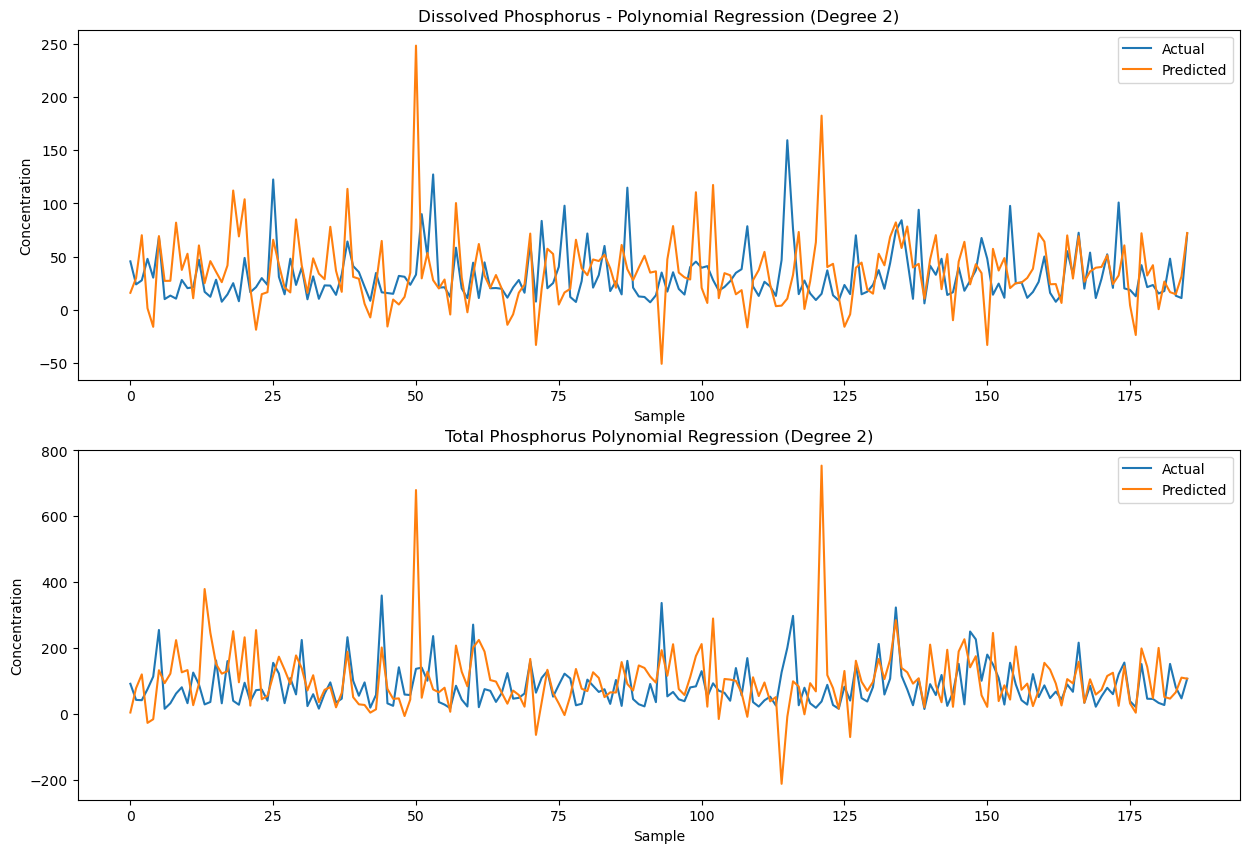

In [ ]:
# polynomial regression

from sklearn.preprocessing import PolynomialFeatures

# fit
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_norm)
X_test_poly = poly.transform(X_test_norm)

# disolved phosphorus
poly_model_dis = LinearRegression()
poly_model_dis.fit(X_poly, y_train_dis)
poly_pred_dis = poly_model_dis.predict(X_test_poly)

# erros
mse_poly_dis = mean_squared_error(y_test_dis, poly_pred_dis)
mae_poly_dis = mean_absolute_error(y_test_dis, poly_pred_dis)
print(f"Polynomial Regression (Degree 2) - Dissolved Phosphorus - MSE: {mse_poly_dis:.4f}")
print(f"Polynomial Regression (Degree 2) - Dissolved Phosphorus - MAE: {mae_poly_dis:.4f}")

# total phosphorus model
poly_model_tot = LinearRegression()
poly_model_tot.fit(X_poly, y_train_tot)
poly_pred_tot = poly_model_tot.predict(X_test_poly)

# errrors
mse_poly_tot = mean_squared_error(y_test_tot, poly_pred_tot)
mae_poly_tot = mean_absolute_error(y_test_tot, poly_pred_tot)
print(f"Polynomial Regression (Degree 2) - Total Phosphorus - MSE: {mse_poly_tot:.4f}")
print(f"Polynomial Regression (Degree 2) - Total Phosphorus - MAE: {mae_poly_tot:.4f}")

# subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(y_test_dis.values, label='Actual')
axs[0].plot(poly_pred_dis, label='Predicted')
axs[0].set_title('Dissolved Phosphorus - Polynomial Regression (Degree 2)') 
axs[0].set_xlabel('Sample')
axs[0].set_ylabel('Concentration')
axs[0].legend()

axs[1].plot(y_test_tot.values, label='Actual')
axs[1].plot(poly_pred_tot, label='Predicted')
axs[1].set_title('Total Phosphorus Polynomial Regression (Degree 2)')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Concentration')
axs[1].legend()




# negative values - hmmm
print(min(poly_pred_dis))

SVR RBF - Dissolved Phosphorus - MSE: 1132.2115
SVR Linear - Dissolved Phosphorus - MSE: 719.2420
SVR RBF - Dissolved Phosphorus - MAE: 23.7647
SVR Linear - Dissolved Phosphorus - MAE: 16.9690


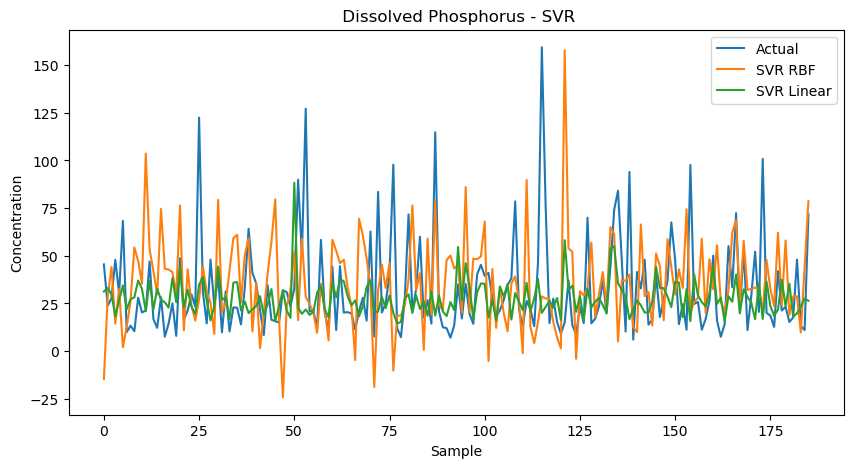

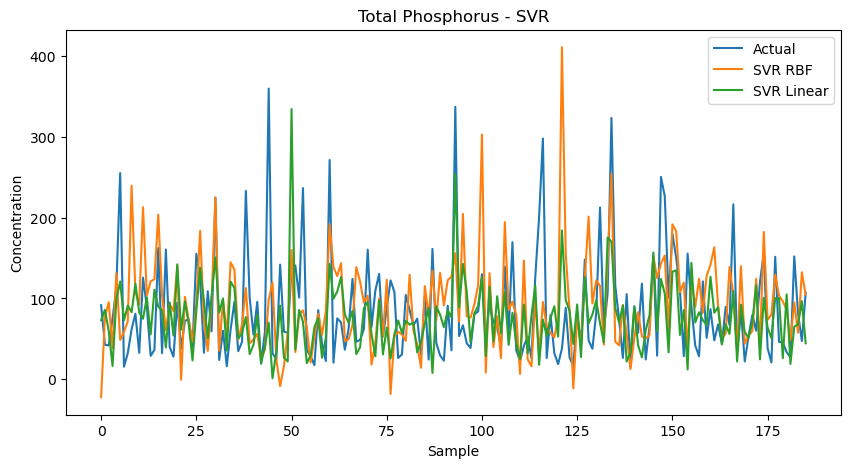

In [ ]:
from sklearn.svm import SVR

# disolved phosphorus
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, edpsilon=.1)
svr_lin = SVR(kernel='linear', C=1e3, gamma=0.1, epsilon=.1)


svr_rbf.fit(X_train_norm, y_train_dis)
svr_lin.fit(X_train_norm, y_train_dis)

svr_rbf_pred_dis = svr_rbf.predict(X_test_norm)
svr_lin_pred_dis = svr_lin.predict(X_test_norm)

# evaluate
mse_svr_rbf_dis = mean_squared_error(y_test_dis, svr_rbf_pred_dis)
mse_svr_lin_dis = mean_squared_error(y_test_dis, svr_lin_pred_dis)
mae_svr_rbf_dis = mean_absolute_error(y_test_dis, svr_rbf_pred_dis)
mae_svr_lin_dis = mean_absolute_error(y_test_dis, svr_lin_pred_dis)

print(f"SVR RBF - Dissolved Phosphorus - MSE: {mse_svr_rbf_dis:.4f}")
print(f"SVR Linear - Dissolved Phosphorus - MSE: {mse_svr_lin_dis:.4f}")
print(f"SVR RBF - Dissolved Phosphorus - MAE: {mae_svr_rbf_dis:.4f}")
print(f"SVR Linear - Dissolved Phosphorus - MAE: {mae_svr_lin_dis:.4f}")

# plot
plt.figure(figsize=(10,5))
plt.plot(y_test_dis.values, label='Actual')
plt.plot(svr_rbf_pred_dis, label='SVR RBF')
plt.plot(svr_lin_pred_dis, label='SVR Linear')
plt.title(' Dissolved Phosphorus - SVR')
plt.xlabel('Sample')
plt.ylabel('Concentration')
plt.legend()

# total phosphorus
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=1e3, gamma=0.1, epsilon=.1)

svr_rbf.fit(X_train_norm, y_train_tot)
svr_lin.fit(X_train_norm, y_train_tot)

svr_rbf_pred_tot = svr_rbf.predict(X_test_norm)
svr_lin_pred_tot = svr_lin.predict(X_test_norm)

# evaluate
mse_svr_rbf_tot = mean_squared_error(y_test_tot, svr_rbf_pred_tot)
mse_svr_lin_tot = mean_squared_error(y_test_tot, svr_lin_pred_tot)
mae_svr_rbf_tot = mean_absolute_error(y_test_tot, svr_rbf_pred_tot)
mae_svr_lin_tot = mean_absolute_error(y_test_tot, svr_lin_pred_tot)


# plot
plt.figure(figsize=(10,5))
plt.plot(y_test_tot.values, label='Actual')
plt.plot(svr_rbf_pred_tot, label='SVR RBF')
plt.plot(svr_lin_pred_tot, label='SVR Linear')
plt.title('Total Phosphorus - SVR')
plt.xlabel('Sample')
plt.ylabel('Concentration')
plt.legend()




In [66]:
# make table of errors 
errors = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Polynomial Regression', 'SVR RBF', 'SVR Linear'],
    'Dissolved Phosphorus MSE': [dis_lin_error, mse_lasso_dis, mse_ridge_dis, mse_poly_dis, mse_svr_rbf_dis, mse_svr_lin_dis],
    'Dissolved Phosphorus MAE': [dis_lin_abs_error, mae_lasso_dis, mas_ridge_tot, mae_poly_dis, mae_svr_rbf_dis, mae_svr_lin_dis],
    'Total Phosphorus MSE': [mse_tot, lasso_mse_tot, mse_ridge_tot, mse_poly_tot, mse_svr_rbf_tot, mse_svr_lin_tot],
    'Total Phosphorus MAE': [mae_tot, lasso_mae_tot, mas_ridge_tot, mae_poly_tot, mae_svr_rbf_tot, mae_svr_lin_tot]
})


# errors.to_html('errors.html', index=False)
errors.to_latex('errors.tex', index=False)


In [ ]:
# example 

df_ex = pd.read_excel('weather_6_day_avg_output.xlsx')

y_dis_ex = df_ex['Dissolved_Phosphorus']
y_tot_ex = df_ex['Total_Phosphorus']
X_ex = df_ex.drop(['Dissolved_Phosphorus', 'Total_Phosphorus'], axis=1)
X_ex = X_ex.drop(['date'], axis=1)

ex_pred_svr = svr_lin.predict(X_ex)
print(ex_pred_svr)




[2450.49594876]
